In [45]:
import pandas as pd
import numpy as np
import os
import pickle

from config import BASE_DIR
print(os.getcwd())
os.chdir(BASE_DIR)
import scripts.functions as fn 
from scripts.indicators import supertrend, volume_level

C:\Users\lbisa\Mi unidad (leonardo.bisaro@gmail.com)\Cripto\python\trd_app


In [46]:
klines_file = './backtest/klines/2d01/Completo_BTCUSDT_2d01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m15/Completo_XRPUSDT_0m15_2021-01-01_2023-07-31.DataFrame'
#klines_file  = './backtest/klines/0m01/Completo_BTCUSDT_0m01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m01/Lateral_BTCUSDT_0m01_2023-06-20_2023-10-09.DataFrame'
#klines_file = './backtest/klines/0m05/Lateral_BTCUSDT_0m05_2023-06-20_2023-10-09.DataFrame'
#klines_file = './backtest/klines/2d01/Lateral_BTCUSDT_2d01_2023-06-20_2023-10-09.DataFrame'
#klines_file  = './backtest/klines/1h01/Completo_BTCUSDT_1h01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/1h01/Lateral_BTCUSDT_1h01_2023-06-20_2023-10-09.DataFrame'
#klines_file  = './backtest/klines/1h04/Completo_BTCUSDT_1h04_2021-01-01_2023-07-31.DataFrame'

#klines_file = './backtest/klines/1h04/Bajista_BTCUSDT_1h04_2021-04-12_2021-07-12.DataFrame'
with open(klines_file, 'rb') as file:
    df = pickle.load(file)
    #data.set_index('datetime',inplace=True)


#Volume Level

In [60]:
"""

vol_period = 50
thresholdExtraHigh = 2
thresholdHigh = 1
thresholdMedium = 0.0
thresholdNormal = -1

df['vol_mean'] = df['volume'].rolling(window=vol_period).mean()
df['vol_std']  = df['volume'].rolling(window=vol_period).std()
df['vol_eh'] = df['vol_std'] * thresholdExtraHigh + df['vol_mean']
df['vol_h'] = df['vol_std'] * thresholdHigh + df['vol_mean']
df['vol_m'] = df['vol_std'] * thresholdMedium + df['vol_mean']
df['vol_n'] = df['vol_std'] * thresholdNormal + df['vol_mean']
df['vol_range'] = np.where((df['volume']>0)&(df['volume']<=df['vol_n']),1,0)
df['vol_range'] = np.where((df['volume']>df['vol_n'])&(df['volume']<=df['vol_m']),2,df['vol_range'])
df['vol_range'] = np.where((df['volume']>df['vol_m'])&(df['volume']<=df['vol_h']),3,df['vol_range'])
df['vol_range'] = np.where((df['volume']>df['vol_h'])&(df['volume']<=df['vol_eh']),4,df['vol_range'])
df['vol_range'] = np.where((df['volume']>df['vol_eh']),5,df['vol_range'])

print('0: ',df[df['vol_range']==0]['vol_range'].count())
print('1: ',df[df['vol_range']==1]['vol_range'].count())
print('2: ',df[df['vol_range']==2]['vol_range'].count())
print('3: ',df[df['vol_range']==3]['vol_range'].count())
print('4: ',df[df['vol_range']==4]['vol_range'].count())
print('5: ',df[df['vol_range']==5]['vol_range'].count())

#El volumen debe estar entre medio (vol_m) y alto (vol_h)
#df['status_vol'] = np.where((df['volume']>df['vol_m']) & (df['volume']<df['vol_h']),df['volume'],None)
df[['volume','vol_eh','vol_h','vol_m','vol_n']][200:].plot(figsize=(20,8),style=['red','gray','gray','gray','gray'])
"""


"\n\nvol_period = 50\nthresholdExtraHigh = 2\nthresholdHigh = 1\nthresholdMedium = 0.0\nthresholdNormal = -1\n\ndf['vol_mean'] = df['volume'].rolling(window=vol_period).mean()\ndf['vol_std']  = df['volume'].rolling(window=vol_period).std()\ndf['vol_eh'] = df['vol_std'] * thresholdExtraHigh + df['vol_mean']\ndf['vol_h'] = df['vol_std'] * thresholdHigh + df['vol_mean']\ndf['vol_m'] = df['vol_std'] * thresholdMedium + df['vol_mean']\ndf['vol_n'] = df['vol_std'] * thresholdNormal + df['vol_mean']\ndf['vol_range'] = np.where((df['volume']>0)&(df['volume']<=df['vol_n']),1,0)\ndf['vol_range'] = np.where((df['volume']>df['vol_n'])&(df['volume']<=df['vol_m']),2,df['vol_range'])\ndf['vol_range'] = np.where((df['volume']>df['vol_m'])&(df['volume']<=df['vol_h']),3,df['vol_range'])\ndf['vol_range'] = np.where((df['volume']>df['vol_h'])&(df['volume']<=df['vol_eh']),4,df['vol_range'])\ndf['vol_range'] = np.where((df['volume']>df['vol_eh']),5,df['vol_range'])\n\nprint('0: ',df[df['vol_range']==0]['vol

<Axes: >

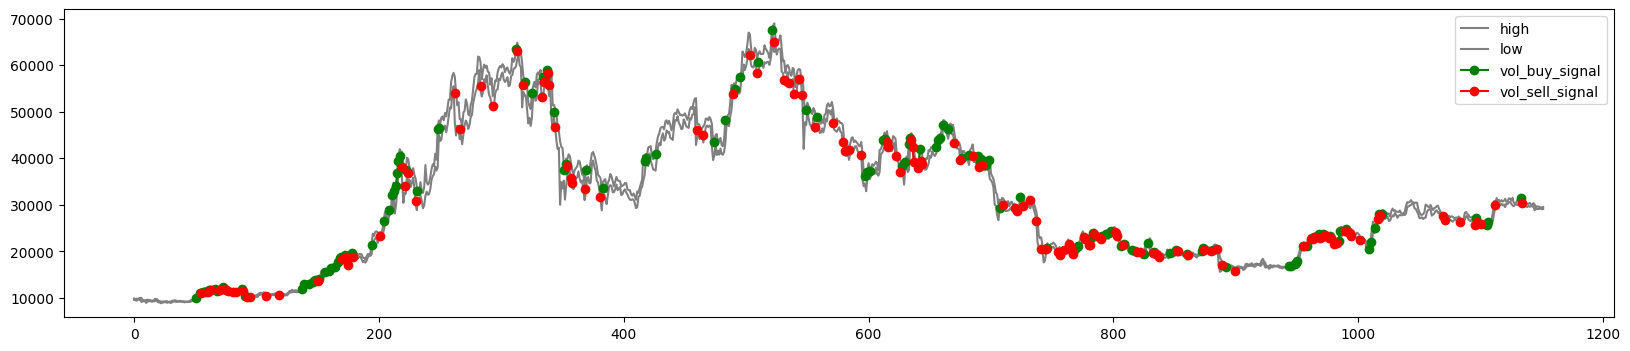

In [61]:
df = volume_level(df,period=50)
df['vol_buy_signal'] = np.where(df['vol_signal']==1,df['close'],None)
df['vol_sell_signal'] = np.where(df['vol_signal']==-1,df['close'],None)
df[['high','low','vol_buy_signal','vol_sell_signal']].plot(figsize=(20,4),style=['gray','gray','g-o','r-o'])

#Supertrend

In [50]:
df = supertrend(df,length=7,multiplier=3)


#Analisis de puntos de entrada

<Axes: >

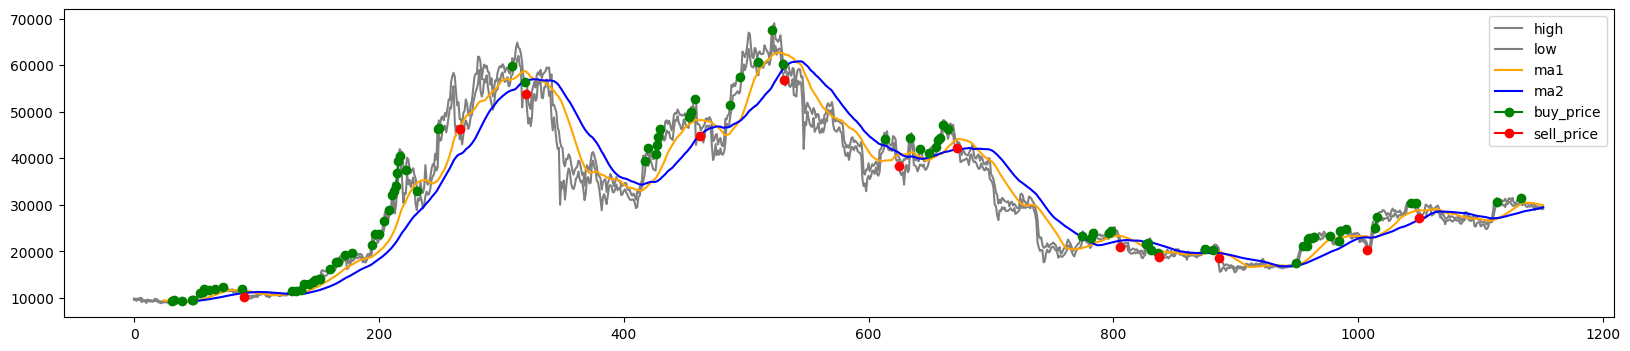

In [51]:
df['buy_price'] = np.where( (df['vol_signal']>0) & (df['st_trend']>0) , df['close'] , None )
df['sell_price'] = np.where( (df['st_trigger']<0) , df['close'] , None )
df['ma1'] = df['close'].rolling(window=25).mean()
df['ma2'] = df['close'].rolling(window=50).mean()

df[['high','low','ma1','ma2','buy_price','sell_price']].plot(figsize=(20,4),style=['gray','gray','orange','blue','g-o','r-o'])
